# Portfolio Performance Analysis
This notebook analyzes a portfolio consisting of two futures contracts (E-mini S&P 500 and 10-Year Treasury Note). It calculates returns, volatility, Sharpe Ratio, and Information Ratio. Additionally, it visualizes the equity curve and rolling correlation between assets.

In [ ]:
# Import necessary libraries
import yfinance as yf  # Fetch market data
import matplotlib.pyplot as plt  # For data visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.dates as mdates  # For formatting x-axis date labels


## Download Data
We fetch the historical prices for E-mini S&P 500 ("ES=F") and 10-Year Treasury Note ("ZN=F"), along with the risk-free rate (3-Month Treasury Bill Yield, "^IRX"). 

Instead of specifying a start date, we take all available data and handle missing values properly by:
- Forward-filling missing values to ensure continuity in the dataset.
- Dropping any remaining missing values at the beginning of the dataset.

In [ ]:
# Define the ticker symbols
tickers = ["ES=F", "ZN=F"]

# Download historical price data and handle missing values
prices = yf.download(tickers)["Close"].ffill().dropna()

# Download risk-free rate (3-month Treasury Bill yield)
risk_free_rate = yf.download("^IRX", start=prices.index[0])["Close"].ffill() / 100  # Convert percentage to decimal


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


# Visualizing the Risk-Free Rate Over Time

In this section, we plot the historical risk-free rate (3-Month Treasury Bill Yield) to observe its trends over time. 

### Steps in the Visualization:
- We use `matplotlib` to create a time-series plot of the risk-free rate.
- The x-axis represents the **years**, and the y-axis represents the **risk-free rate**.
- We format the x-axis to display **one tick per year** using `matplotlib.dates`.
- Labels, a title, and a legend are added for clarity.
- A **grid** is included to enhance readability.

This visualization helps us understand changes in the **risk-free rate**, which is important for calculating metrics like the **Sharpe ratio** in later steps.


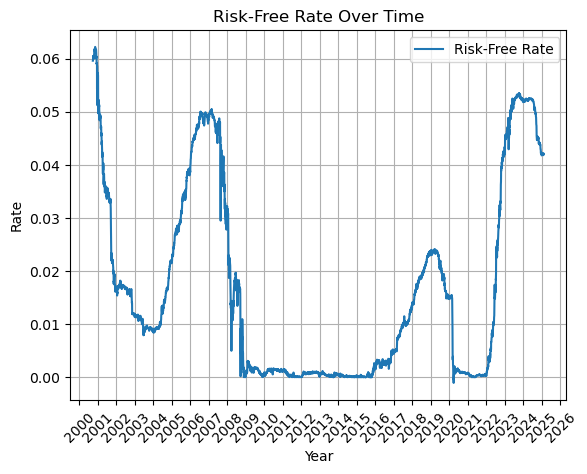

In [ ]:
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the risk-free rate with a blue line
ax.plot(risk_free_rate, label='Risk-Free Rate')
# Set the title of the plot
ax.set_title('Risk-Free Rate Over Time')

# Label the x-axis as 'Year'
ax.set_xlabel('Year')

# Label the y-axis as 'Rate'
ax.set_ylabel('Rate')

# Format the x-axis to show one tick per year
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major tick locations to years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tick labels as years

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add grid lines for better visualization
ax.grid()

# Add a legend to indicate what the plotted line represents
ax.legend()

# Display the plot
plt.show()


## Compute Returns and Rolling Correlation
We compute percentage returns from price data and rolling correlation between the two assets over a one-year window (252 trading days).

In [ ]:
# Compute returns
returns = prices.pct_change().dropna()

# Compute rolling correlation with a 252-day window
rolling_corr = returns["ES=F"].rolling(252).corr(returns["ZN=F"])


# Cumulative Returns & Rolling Correlation

In this section, we visualize the cumulative returns of the **E-mini S&P 500 futures (ES)** and **10-Year Treasury Note futures (ZN)** alongside their **rolling correlation**. 

### Key Components:
- **Cumulative Returns**: Show the growth of $1 invested in ES and ZN futures.
- **Rolling Correlation**: A **252-day (1-year) rolling window** calculates the correlation between the two assets.
- **Plot Customization**:
  - ES and ZN are plotted as **dashed lines**.
  - Rolling correlation is displayed as a **dotted red line**.
  - X-axis labels show **one tick per year** and are **rotated 45 degrees** for readability.
  - A **grid** is included for better visualization.

This plot helps analyze how the relationship between equities and bonds evolves over time.


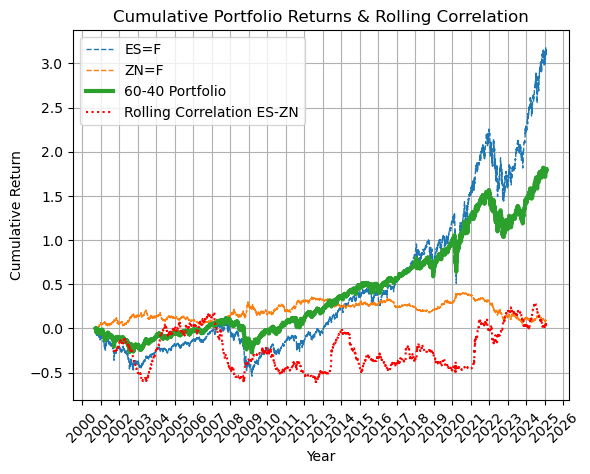

In [ ]:
# Compute cumulative returns for individual assets and portfolio
cum_returns = (1 + returns).cumprod()

# Compute portfolio returns with 60-40 weighting
portfolio_weights = [0.6, 0.4]
portfolio_returns = (returns * portfolio_weights).sum(axis=1)
cum_portfolio_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns and rolling correlation
fig, ax = plt.subplots()
ax.plot(cum_returns.index, cum_returns["ES=F"] - 1, linestyle='--', linewidth=1, label='ES=F')
ax.plot(cum_returns.index, cum_returns["ZN=F"] - 1, linestyle='--', linewidth=1, label='ZN=F')
ax.plot(cum_portfolio_returns.index, cum_portfolio_returns - 1, linewidth=3, label='60-40 Portfolio')

# Plot rolling correlation
ax.plot(rolling_corr.index, rolling_corr, linestyle=':', linewidth=1.5, label='Rolling Correlation ES-ZN', color='red')

ax.set_title('Cumulative Portfolio Returns & Rolling Correlation')
ax.set_xlabel('Year')
ax.set_ylabel('Cumulative Return')
ax.legend()
ax.grid()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()
